数据中空值情况：
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

数据大小为：
(506, 14)

数据前五行：
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
float64    14
dtype: int64
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.00

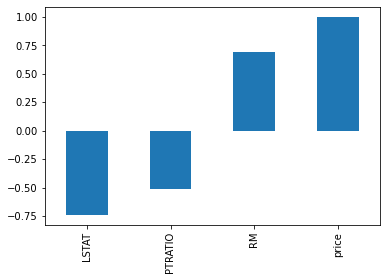

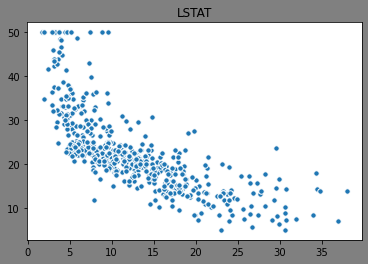

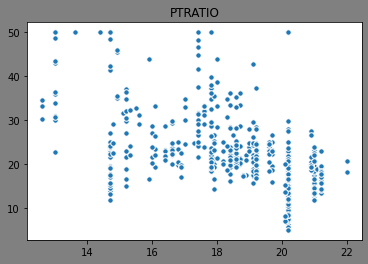

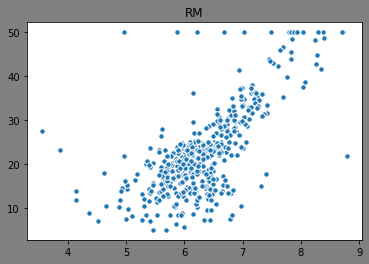

In [8]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from LinearRegression import LinearRegression1
from LinearRegression import LinearRegression2
boston=load_boston()#加载数据集
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df['price'] = boston.target
# 查看数据是否存在空值，发现不存在，不需进行空值处理

print("数据中空值情况：")
print(df.isnull().sum())
# 查看数据大小
print("\n数据大小为：")
print(df.shape)
# 显示数据前5行
print("\n数据前五行：")
print(df.head())
# 查看数据类型
print(df.dtypes.value_counts())
# 查看数据描述
print(df.describe())
#计算每一个特征和price的相关系数
print(df.corr()['price'])
#将相关系数大于0.5的特征画图显示出来
corr = df.corr()
corr = corr['price']
corr[abs(corr)>0.5].sort_values().plot.bar()
plt.show()
#发现LSTAT、PTRATIO、RM三个特征的相关系数大于0.5，下面画出三个特征关于price的散点图。
# LSTAT 和房价的散点图
plt.figure(facecolor='gray')
plt.scatter(df['LSTAT'], df['price'], s=30, edgecolor='white')
plt.title('LSTAT')
plt.show()
# PTRATIO 和房价的散点图
plt.figure(facecolor='gray')
plt.scatter(df['PTRATIO'], df['price'], s=30, edgecolor='white')
plt.title('PTRATIO')
plt.show()
# RM 和房价的散点图
plt.figure(facecolor='gray')
plt.scatter(df['RM'], df['price'], s=30, edgecolor='white')
plt.title('RM')
plt.show()
#作图后发现三个特征和价格都有明显的线性关系，故选用这三个特征来进行预测
# 制作训练集和测试集的数据
data_pd = df[['LSTAT','PTRATIO','RM','price']]
y = np.array(data_pd['price'])
data_pd=data_pd.drop(['price'],axis=1)
X = np.array(data_pd)
# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
from sklearn import preprocessing
# 初始化标准化器
min_max_scaler = preprocessing.MinMaxScaler()
# 分别对训练和测试数据的特征以及目标值进行标准化处理
X_train = min_max_scaler.fit_transform(X_train)
y_train = min_max_scaler.fit_transform(y_train.reshape(-1,1)) # reshape(-1,1)指将它转化为1列，行自动确定
X_test = min_max_scaler.fit_transform(X_test)
y_test = min_max_scaler.fit_transform(y_test.reshape(-1,1))

# 加载模型，这里以梯度下降法为例
linreg = LinearRegression1()
# 拟合数据
linreg.fit(X_train,X_train)
# 进行预测
y_predict = linreg.predict(X_test)
#print(y_predict)




        



    